In [1]:
# numerical and scientific computing libraries
import numpy as np
import scipy as sp

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create a random matrix of size n x m with the rank k <= min(n, m).
def create_random_matrix(n: int, m: int, k: int) -> np.ndarray:
    if k < 0:
        k = min(n, m)

    if k > min(n, m):
        raise ValueError("k must be less than or equal to min(n, m)")
    a = np.random.randn(n, k)
    b = np.random.randn(k, m)
    return np.dot(a, b)

In [3]:
# create a positive definite matrix of size n x n.
def create_positive_definite_matrix(n: int) -> np.ndarray:
    a = np.random.randn(n, n)
    return np.dot(a, a.T)

In [4]:
# compute the eigenvalues of a given matrix.
def compute_eigenvalues(matrix: np.ndarray) -> np.ndarray:
    return sp.linalg.eigvals(matrix)

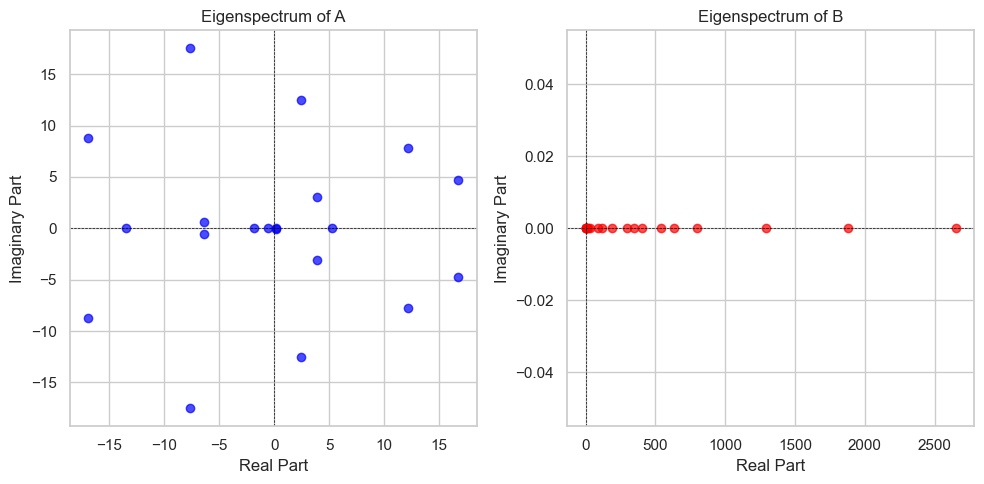

In [25]:
A = create_random_matrix(20, 20, 20)
B = A @ A.T # make B positive definite

# compute the eigenvalues of A
eigenvalues_A = compute_eigenvalues(A)
# compute the eigenvalues of B
eigenvalues_B = compute_eigenvalues(B)

# plot the eigenspecturms of A and B, separately.
# each plot should be a scatter plot of real and imaginary part.
# make sure they are visually appealing.
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(eigenvalues_A.real, eigenvalues_A.imag, color='blue', alpha=0.7)
axs[0].set_title('Eigenspectrum of A')
axs[0].set_xlabel('Real Part')
axs[0].set_ylabel('Imaginary Part')
axs[0].axhline(0, color='black', lw=0.5, ls='--')
axs[0].axvline(0, color='black', lw=0.5, ls='--')
axs[0].grid(True)

axs[1].scatter(eigenvalues_B.real, eigenvalues_B.imag, color='red', alpha=0.7)
axs[1].set_title('Eigenspectrum of B')
axs[1].set_xlabel('Real Part')
axs[1].set_ylabel('Imaginary Part')
axs[1].axhline(0, color='black', lw=0.5, ls='--')
axs[1].axvline(0, color='black', lw=0.5, ls='--')
axs[1].grid(True)
plt.tight_layout()

plt.show()

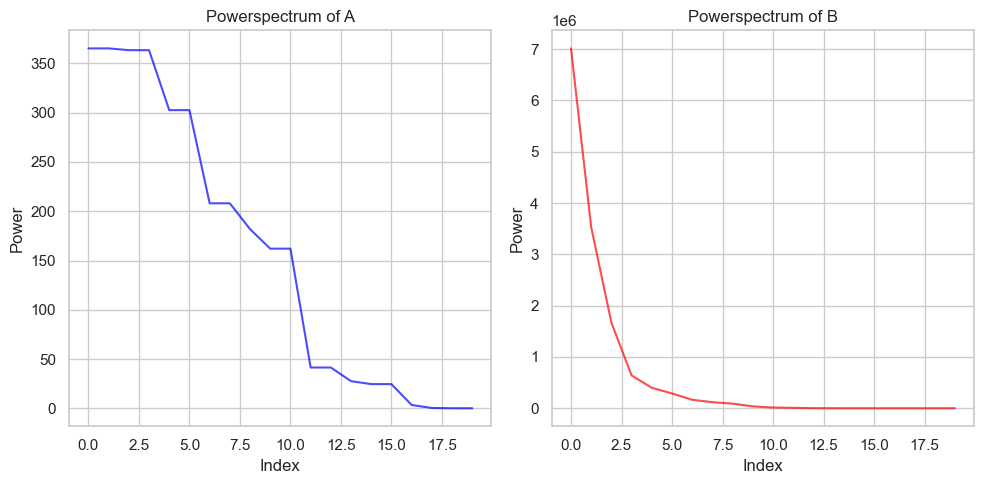

In [30]:
# plot the powerspectrums of A and B.
# make sure to sort them in the descending order.
# make sure it is visually appealing.
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(np.sort(np.abs(eigenvalues_A)**2)[::-1], color='blue', alpha=0.7)
axs[0].set_title('Powerspectrum of A')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Power')
axs[0].grid(True)

axs[1].plot(np.sort(np.abs(eigenvalues_B)**2)[::-1], color='red', alpha=0.7)
axs[1].set_title('Powerspectrum of B')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Power')
axs[1].grid(True)
plt.tight_layout()

plt.show()

In [35]:
# compute the sum of the real eigenvalues of B.
sum_real_eigenvalues_B = np.sum(eigenvalues_B.real)
print(f"Sum of the real eigenvalues of B: {sum_real_eigenvalues_B}")

# compute the trace of B.
trace_B = np.trace(B)
print(f"Trace of B: {trace_B}")

Sum of the real eigenvalues of B: 9305.350143731937
Trace of B: 9305.350143731925


In [39]:
# perform SVD on A.
U, s, Vh = sp.linalg.svd(A)
# print the singular values.
print(f"Squared singular values of A: ")
print(np.array2string(s**2, precision=2, suppress_small=True))
# print the real eigenvalues of B.
print(f"\nReal eigenvalues of B: ")
print(np.array2string(eigenvalues_B.real, precision=2, suppress_small=True))

Squared singular values of A: 
[2648.67 1878.82 1291.49  799.77  631.69  537.41  406.13  344.26  299.99
  191.1   117.62   88.76   33.66   19.54    8.7     4.48    2.48    0.71
    0.05    0.  ]

Real eigenvalues of B: 
[2648.67 1878.82 1291.49  799.77  631.69  537.41  406.13  344.26  299.99
  191.1   117.62   88.76   33.66   19.54    8.7     4.48    2.48    0.71
    0.      0.05]
